# Grover's Algorithm For a 5 Qubit System in Qiskit
### James Saslow
### 6/21/2023


This is an Example of how to Simulate a 5-Qubit Grovers Algorithm in Qiskit

In [1]:
# Importing Packages
from qiskit import IBMQ
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, transpiler, transpile, assemble
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
S_simulator = Aer.backends(name='statevector_simulator')[0]

# What is Grover's Algorithm?

Grover's algorithm is a search algorithm that completes a search in $\sqrt{N}$ time


# Procedure

### 1) Perform a Haddamard Transformation.
Every Qubit gets a Haddamard Gate, H

### 2) Impliment the Oracle
The Oracle selects a marked state. In this example, |11111> is our marked state. But we can choose to select a different marked state if we choose by implimenting some X gates before our oracle.

### 3) Impliment the Diffusion Operator

The Diffusion operator consists of

1) A Haddamard Transformation

2) An X Transformation

3) The Oracle

4) An X Transformation

5) A Haddamard Transformation


### 4) Iterate the Algorithm t times where $t = int(\frac{\pi}{4}\sqrt{2^{number-of-qubits}})$

### 5) Perform Measurements on a Classical Simulator and Plot Results
- How does Grovers change with Each Iteration?
- Plot a Quantum Circuit Diagram


In [2]:
# Prompting Parameters of my quantum circuit

q     = QuantumRegister(5,name='q')         # Number of q-bits
c     = ClassicalRegister(5,'c')            # Number of Classical Bits
anc   = QuantumRegister(3, name = 'anc')    # Number of ancilla qbits
qc    = QuantumCircuit(q,anc,c,name = 'qc')  # Defining quantum circuit


# Theoretical Number of Iterations to run Grover's Algorithm
t = int(np.pi/4 * np.sqrt(2**len(q)))

print('Needed # of iterations: ', t)
print('=================================================================================')
#===================================================================================================================

# Circuit Construction 

# Defining a Haddamard Transformation    
def H_Transformation(q,anc,qc):
    for i in range(len(q)):
        qc.h(q[i])
        

        
# Defining the Oracle Operator
def Oracle_B(q,anc,qc):
    #--------------------------------------
    # The equivalent of a C^5 Z Gate
    #--------------------------------------
    qc.ccx(q[0],q[1],anc[0])
    qc.ccx(q[2],q[3],anc[1])
    qc.ccx(anc[0],anc[1],anc[2])
    qc.cz(anc[2],q[4])
    qc.ccx(anc[0],anc[1],anc[2])
    qc.ccx(q[2],q[3],anc[1])
    qc.ccx(q[0],q[1],anc[0])


# Defining a Not Transformation
def X_Transformation(q,anc,qc):
    for i in range(len(q)):
        qc.x(q[i])
        
    
    
# Defining the Diffusion Operator
def Diffusion(q,anc,qc):
    H_Transformation(q,anc,qc)
    X_Transformation(q,anc,qc)
    Oracle_B(q,anc,qc)
    X_Transformation(q,anc,qc)
    H_Transformation(q,anc,qc)
    

# Defining for a specific number of iterations
def Grovers(q,anc,qc, iterations):
    H_Transformation(q,anc,qc) # Initialize Grovers by assigning an equal probability to each basis
    for i in range(iterations):
        Oracle_B(q,anc,qc)     # Selecting the marked state with a (-) sign
        Diffusion(q,anc,qc)    # Optimization 
    qc.measure(q,c)            # Collapsing all qubits to classical bits

#===================================================================================================================

Needed # of iterations:  4


In [3]:
# Defining a function that uses a Classical Circuit Simulator to Simulate a Quantum Computer
def run_job(qc, shots):
    job = execute(qc, S_simulator, shots=shots)
    result = job.result()
    counts = result.get_counts(qc)

    state = []
    freq  = []
    for name, value in counts.items():
        state.append(name)    
        freq.append(value)
    return state, freq



# Defining a function that plots a histogram of psuedo-experimental outcomes
def PlotHist(state, freq):
    # Plotting a Histogram of Measured Outcomes
    plt.figure(figsize = (6.5,4.5))
    plt.bar(state, freq)
    plt.title("Quantum States Measured After Implimenting Grover's Algorithm")
    plt.xlabel('Quantum States')
    plt.ylabel('Frequency of States Measured')
    plt.xticks(rotation=70) 
    plt.show()

Iteration = 0
Chance of Detecting Marked State:  3.4 %


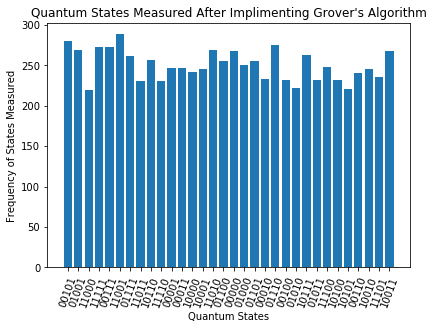

Iteration = 1
Chance of Detecting Marked State:  25.66 %


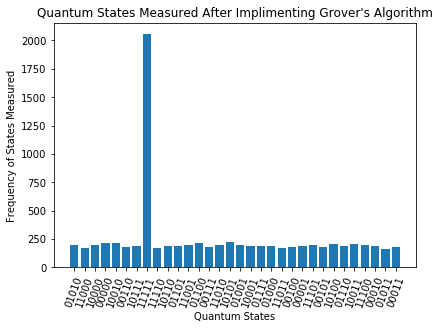

Iteration = 2
Chance of Detecting Marked State:  59.92 %


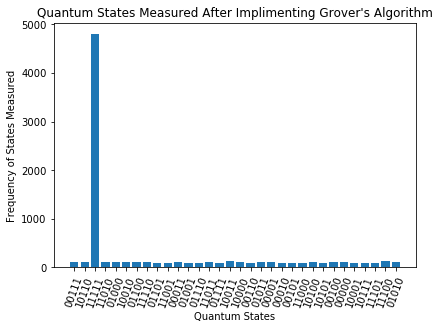

Iteration = 3
Chance of Detecting Marked State:  90.05 %


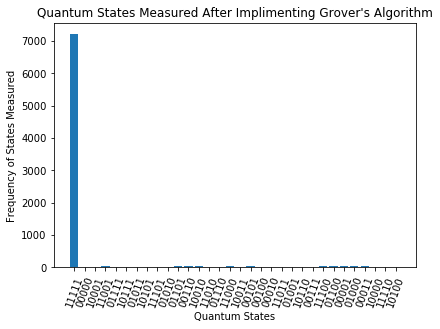

Iteration = 4
Chance of Detecting Marked State:  99.96 %


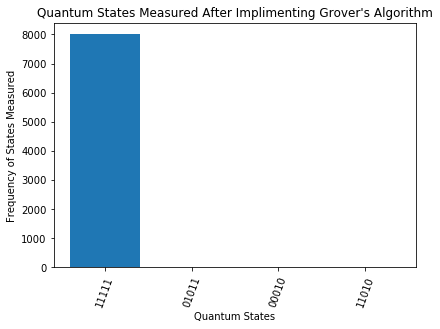

In [4]:
# Plotting Grover's for every iteration
for i in range(t+1):
    # Resetting our circuit every loop
    q     = QuantumRegister(5,name='q')         # Number of q-bits
    c     = ClassicalRegister(5,'c')            # Number of Classical Bits
    anc   = QuantumRegister(3, name = 'anc')    # Number of ancilla qbits
    qc    = QuantumCircuit(q,anc,c,name = 'qc')  # Defining quantum circuit
    
    Grovers(q,anc,qc, i)
    state, freq = run_job(qc, shots=8000)
    print('==============================================================================')
    print('Iteration =', i)
    
    index = state.index('11111') # Index of the marked state in the array
    marked_count = freq[index]
    print('Chance of Detecting Marked State: ', np.round(100*marked_count/sum(freq),2), '%')
    
    
    
    PlotHist(state, freq)

In [5]:
# Printing Entire Quantum Circuit for 4 iterations of Grover's algorithm
print(qc)

       ┌───┐                                 ┌───┐┌───┐                       »
  q_0: ┤ H ├──■───────────────────────────■──┤ H ├┤ X ├──■────────────────────»
       ├───┤  │                           │  ├───┤├───┤  │                    »
  q_1: ┤ H ├──■───────────────────────────■──┤ H ├┤ X ├──■────────────────────»
       ├───┤  │                           │  ├───┤├───┤  │                    »
  q_2: ┤ H ├──┼────■─────────────────■────┼──┤ H ├┤ X ├──┼────■───────────────»
       ├───┤  │    │                 │    │  ├───┤├───┤  │    │               »
  q_3: ┤ H ├──┼────■─────────────────■────┼──┤ H ├┤ X ├──┼────■───────────────»
       ├───┤  │    │          ┌───┐  │    │  ├───┤└───┘  │    │          ┌───┐»
  q_4: ┤ H ├──┼────┼────────■─┤ H ├──┼────┼──┤ X ├───────┼────┼────────■─┤ X ├»
       └───┘┌─┴─┐  │        │ └───┘  │  ┌─┴─┐└───┘     ┌─┴─┐  │        │ └───┘»
anc_0: ─────┤ X ├──┼────■───┼───■────┼──┤ X ├──────────┤ X ├──┼────■───┼───■──»
            └───┘┌─┴─┐  │   │   │  ┌─┴─┐